<a href="https://colab.research.google.com/github/Alexis-Machado/EA3-Optimizacion-procesos-de-desarrollo/blob/feature%2FActividad1/AlexisMachado_QueniaVanegas_Juli%C3%A1nMart%C3%ADnez_EA3_Optimizaci%C3%B3n_procesos_de_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests  # Para realizar peticiones HTTP y obtener respuestas de sitios web
from bs4 import BeautifulSoup  # Para parsear y analizar contenido HTML y XML
import pandas as pd  # Para análisis y manipulación de datos
from tabulate import tabulate  # Para imprimir tablas en consola de manera elegante
import time  # Para trabajar con fechas y horas
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import numpy as np  # Para operaciones numéricas y manipulación de matrices
import re  # Para expresiones regulares, útil para limpiar el texto
import seaborn as sns  # Para crear gráficos estadísticos
from wordcloud import WordCloud  # Para crear nubes de palabras

# Lista de URLs de los productos en Mercado Libre (Celulares XIAOMI REDMI)
product_urls = [
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-13-pro-12gb-512gb-4g-negro/p/MCO36180832',
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-10s-128gb-6gb-azul-color-azul-oceano/p/MCO18027045?pdp_filters=item_id:MCO657867729#is_advertising=true&searchVariation=MCO18027045&position=2&search_layout=stack&type=pad&tracking_id=a8b65aed-ff78-4b7c-a5d6-32d078db8d01&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=2&ad_click_id=ZjgxZTYxNTYtZmI0My00M2VlLTg3N2QtZjQxZDZkOTNjNjNj',
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-13-pro-4g-256-gb-8-ram-color-verde-oscuro/p/MCO29901348#polycard_client=search-nordic&searchVariation=MCO29901348&position=3&search_layout=stack&type=product&tracking_id=1ada35b5-f1b5-4cd0-9aad-a2d4f8c65450&wid=MCO1463601279&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-9c-dual-sim-64-gb-purpura-lavanda-3-gb-ram/p/MCO19174504#polycard_client=search-nordic&searchVariation=MCO19174504&position=4&search_layout=stack&type=product&tracking_id=9cc81439-1404-4426-bbb4-3e9431f8e892&wid=MCO1072530486&sid=search',
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-8-2021-64g-4gb-space-black/p/MCO15188552#polycard_client=search-nordic&searchVariation=MCO15188552&position=2&search_layout=stack&type=product&tracking_id=f23df56c-7648-4572-b323-e4effb5533d6&wid=MCO2017928956&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-note-13-4g-dual-sim-256-gb-negro-8-gb-ram/p/MCO29751162#polycard_client=search-nordic&searchVariation=MCO29751162&position=6&search_layout=stack&type=product&tracking_id=520332f2-a22b-4bff-bade-e37155f12ef2&wid=MCO1463626145&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-13c-dual-sim-256-gb-navy-blue-4-gb-ram/p/MCO37896827#polycard_client=search-nordic&searchVariation=MCO37896827&position=6&search_layout=stack&type=product&tracking_id=d73ab1a9-9f02-4e10-b817-0d1cb464dc01&wid=MCO2619309542&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-note-11-snapdragon-dual-sim-128-gb-gris-grafito-4-gb-ram/p/MCO18924350#polycard_client=search-nordic&searchVariation=MCO18924350&position=16&search_layout=stack&type=product&tracking_id=61cb3946-0def-4d05-8935-19cef920dece&wid=MCO1609873166&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-a3-dual-sim-64-gb-3-gb-ram-negro/p/MCO34729824#polycard_client=search-nordic&searchVariation=MCO34729824&position=15&search_layout=stack&type=product&tracking_id=759ee116-c309-4926-b5b9-905e1863e247&wid=MCO1489695083&sid=search',
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-a3-4gb128gb-star-blue/p/MCO38296859#polycard_client=search-nordic&searchVariation=MCO38296859&position=28&search_layout=stack&type=product&tracking_id=b001cebe-85c4-46b7-a98b-4447664c8a75&wid=MCO2646097164&sid=search'
]

# Lista para almacenar la información de los productos
products_data = []

# Cabecera de la solicitud
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

# Función para obtener y parsear los datos de un producto de una URL
def scrape_mercadolibre_product(url):
    # Realizamos la petición GET a la página
    response = requests.get(url, headers=headers)
    if response.status_code == 200:

        # Parseamos el contenido de la página
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extraemos el título del producto
        Titulo = soup.find('h1', class_='ui-pdp-title').get_text().strip()

        # Extraemos el precio del producto
        Precio = soup.find('span', class_='andes-money-amount__fraction').get_text().strip()

        # Extraemos la descripción del producto
        Descripción = soup.find('p', class_='ui-pdp-description__content').get_text().strip()

        # Extraemos la puntación de estrellas del producto
        estrellas = soup.find('span', class_='ui-pdp-review__rating').get_text().strip()

        # Extraemos las ventas del producto
        ventas_element = soup.find('span', class_='ui-pdp-subtitle')
        ventas = ventas_element.get_text().strip() if ventas_element else "N/A"

        # Extraemos el total de calificaciones
        total_calificaciones = soup.find('p', class_='ui-review-capability__rating__label').get_text().strip()

        # Retornamos los datos del producto en forma de diccionario
        return {
            'Nombre': Titulo,
            'Precio': Precio,
            'estrellas': estrellas,
            'ventas': ventas,
            'total_calificaciones': total_calificaciones,
            'Descripción': Descripción
        }
    else:
        print(f"Error al acceder a la página {url}, código de estado: {response.status_code}")
        return None

# Función para limpiar los datos de ventas
def limpiar_ventas(ventas):
    # Usamos expresiones regulares para extraer solo el número de ventas
    match = re.search(r'(\d+)', ventas.replace('mil', '000'))
    if match:
        return int(match.group(1))
    return 0  # Si no hay ventas, asumimos 0

# Iteramos sobre cada URL con mensajes de extracción para más detalles
for url in product_urls:
    print(f"Extrayendo datos de: {url}")
    product_data = scrape_mercadolibre_product(url)  # Llamamos a la función para obtener los datos
    if product_data:
        products_data.append(product_data)
        print(f"Datos extraídos: {product_data}\n")
    else:
        print(f"Error al extraer datos de: {url}")
    time.sleep(3)  # Añadimos un retraso de 3 segundos entre cada solicitud

# Convertimos la lista de productos en un DataFrame de pandas
df = pd.DataFrame(products_data)

# Limpiamos la columna de ventas
df['ventas_limpias'] = df['ventas'].apply(limpiar_ventas)

# Extraer sólo la parte numérica de 'total_calificaciones' antes de convertir a int
df['total_calificaciones'] = df['total_calificaciones'].str.extract('(\d+)').astype(int)

# Mostramos la tabla con los productos en formato tabular usando tabulate
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

# Guardamos la tabla
df.to_csv('productos_mercado_libre.csv', index=False)
print("\nDatos guardados en 'productos_mercado_libre.csv'")

Extrayendo datos de: https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-13-pro-12gb-512gb-4g-negro/p/MCO36180832
Datos extraídos: {'Nombre': 'Celular Xiaomi Redmi Note 13 Pro 12GB 512GB 4G Negro', 'Precio': '1.285.900', 'estrellas': '4.8', 'ventas': 'Nuevo  |  +100 vendidos', 'total_calificaciones': '594 calificaciones', 'Descripción': 'Xiaomi Redmi Note 13 PRO 12/512GB 4G- Dual SIM | Nano-SIM- Redes: GSM/HSPA/LTE- Pantalla: 6.67 pulgadas | Resolución 1080 x 2400 píxeles | AMOLED, 1B de colores, 120 Hz, 500 nits (típico), 1000 nits (HBM), 1300 nits (pico)- Sistema operativo: Android 13, MIUI 14- Procesador: Mediatek Helio G99 Ultra- Memoria RAM: 12 GB- Memoria ROM: 512 GB- Cámara principal: 200 MP, f/1,7, 23 mm (ancho), 1/1,4", 0,56 µm, PDAF multidireccional, OIS | 8 MP, f/2,2, 118° (ultra gran angular) | 2 MP, f/2,4, (macro)- Cámara frontal: 16MP, f/2.4, (gran angular)- Conectividad: Wi-Fi 802.11 a/b/g/n/ac, Bluetooth 5.2- Sensores: Huella digital (debajo de la pantalla, óptica

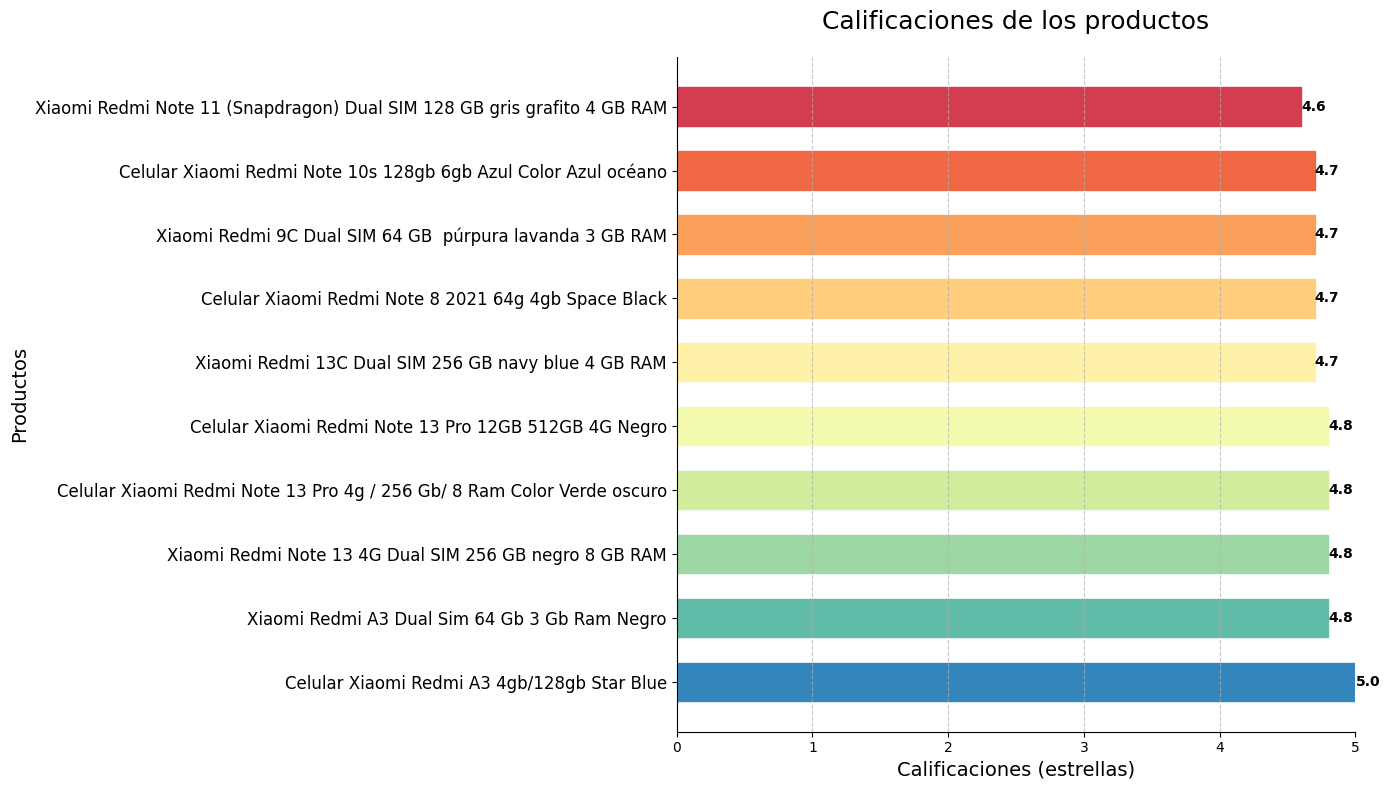

In [ ]:
# Convertir 'estrellas' a numérico
df['estrellas'] = pd.to_numeric(df['estrellas'], errors='coerce')

# Ordenar el dataframe por 'estrellas' en orden descendente
df_sorted = df.sort_values('estrellas', ascending=True)

# Seleccionar los 10 productos
df_top = df_sorted.tail(10)

# Crear el gráfico
plt.figure(figsize=(14, 8))
bars = plt.barh(df_top['Nombre'], df_top['estrellas'], height=0.6)

# Personalizar los colores
colors = plt.cm.Spectral(np.linspace(0.1, 0.9, len(df_top)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Personalizar el gráfico
plt.title('Calificaciones de los productos', fontsize=18, pad=20)
plt.xlabel('Calificaciones (estrellas)', fontsize=14)
plt.ylabel('Productos', fontsize=14)
plt.xlim(0, 5)  # Establecer el límite del eje x de 0 a 5 estrellas
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Agregar líneas de cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Aumentar el tamaño de la fuente para los nombres de los productos
plt.yticks(fontsize=12)

# Agregar etiquetas de valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

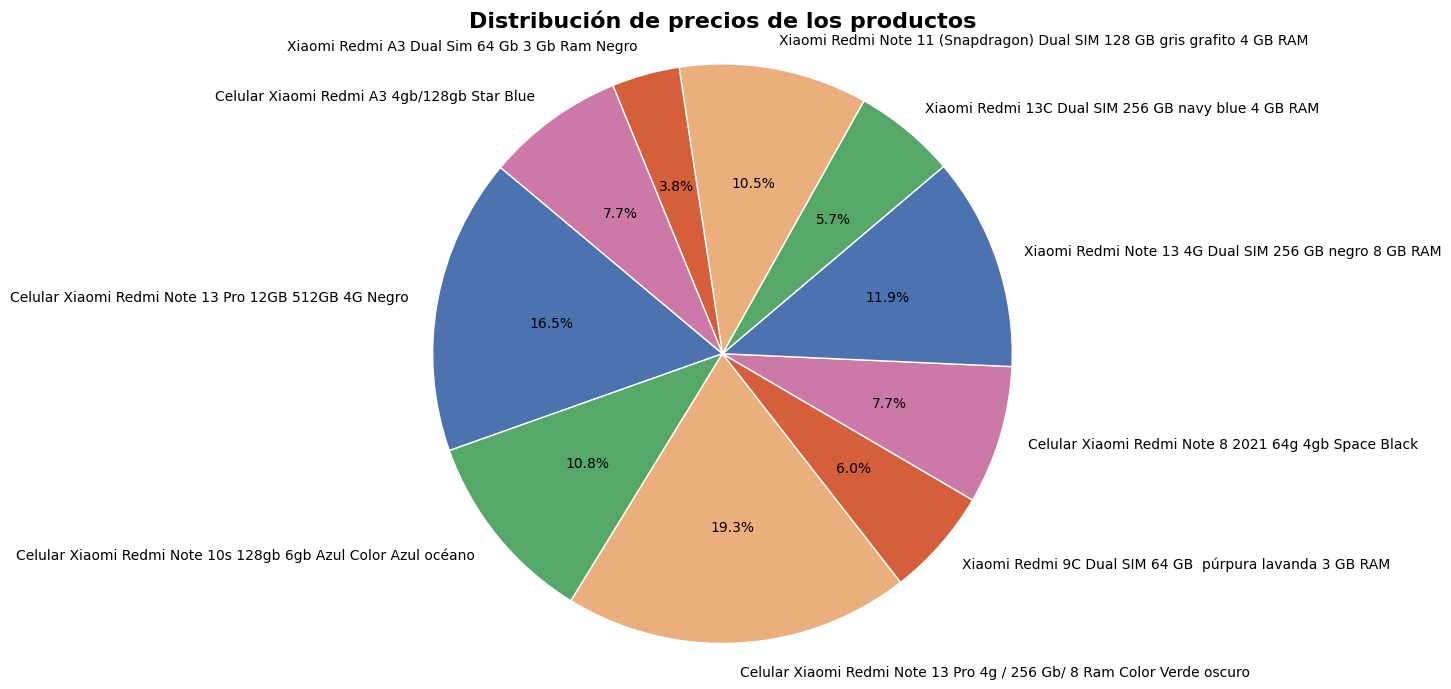

In [ ]:
# Colores suaves
colors = ['#4C72B0', '#55A868', '#EBAE7D', '#D55E3B', '#CC79A7']

# Convertimos las columnas 'Precio' y 'total_calificaciones' a numéricas
df['Precio'] = df['Precio'].str.replace('.', '').astype(float)

# Gráfico de pastel con los precios
plt.figure(figsize=(13, 7))
plt.pie(df['Precio'], labels=df['Nombre'], colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.title('Distribución de precios de los productos', fontsize=16, color='black', fontweight='bold')
plt.axis('equal')
plt.grid(False)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

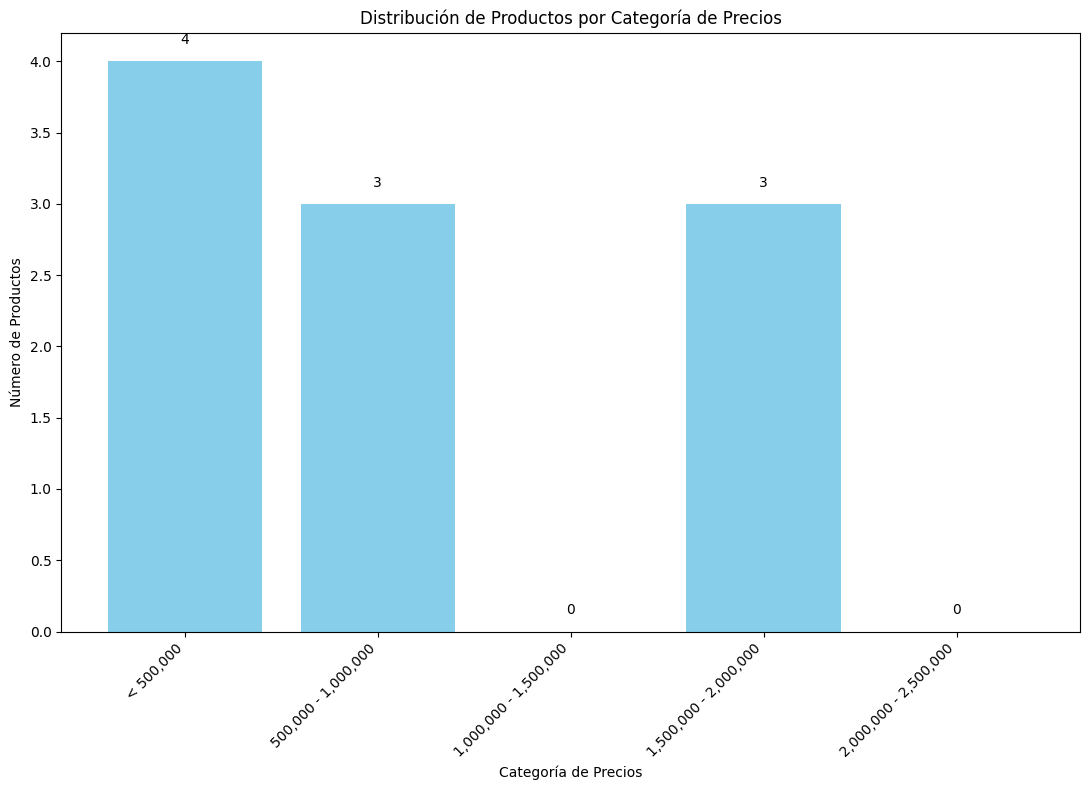

In [ ]:
# Categorías considerando los 10 productos
precio_categorias_actualizado = {
    '< 500,000': 4,
    '500,000 - 1,000,000': 3,
    '1,000,000 - 1,500,000': 0,
    '1,500,000 - 2,000,000': 3,
    '2,000,000 - 2,500,000': 0
}

# Crear el gráfico de barras
categorias_actualizadas = list(precio_categorias_actualizado.keys())
cantidad_productos_actualizada = list(precio_categorias_actualizado.values())

plt.figure(figsize=(11, 8))
bars = plt.bar(categorias_actualizadas, cantidad_productos_actualizada, color='skyblue')

# Añadimos etiquetas de cantidad sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, yval, ha='center', va='bottom')

plt.title('Distribución de Productos por Categoría de Precios')
plt.xlabel('Categoría de Precios')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

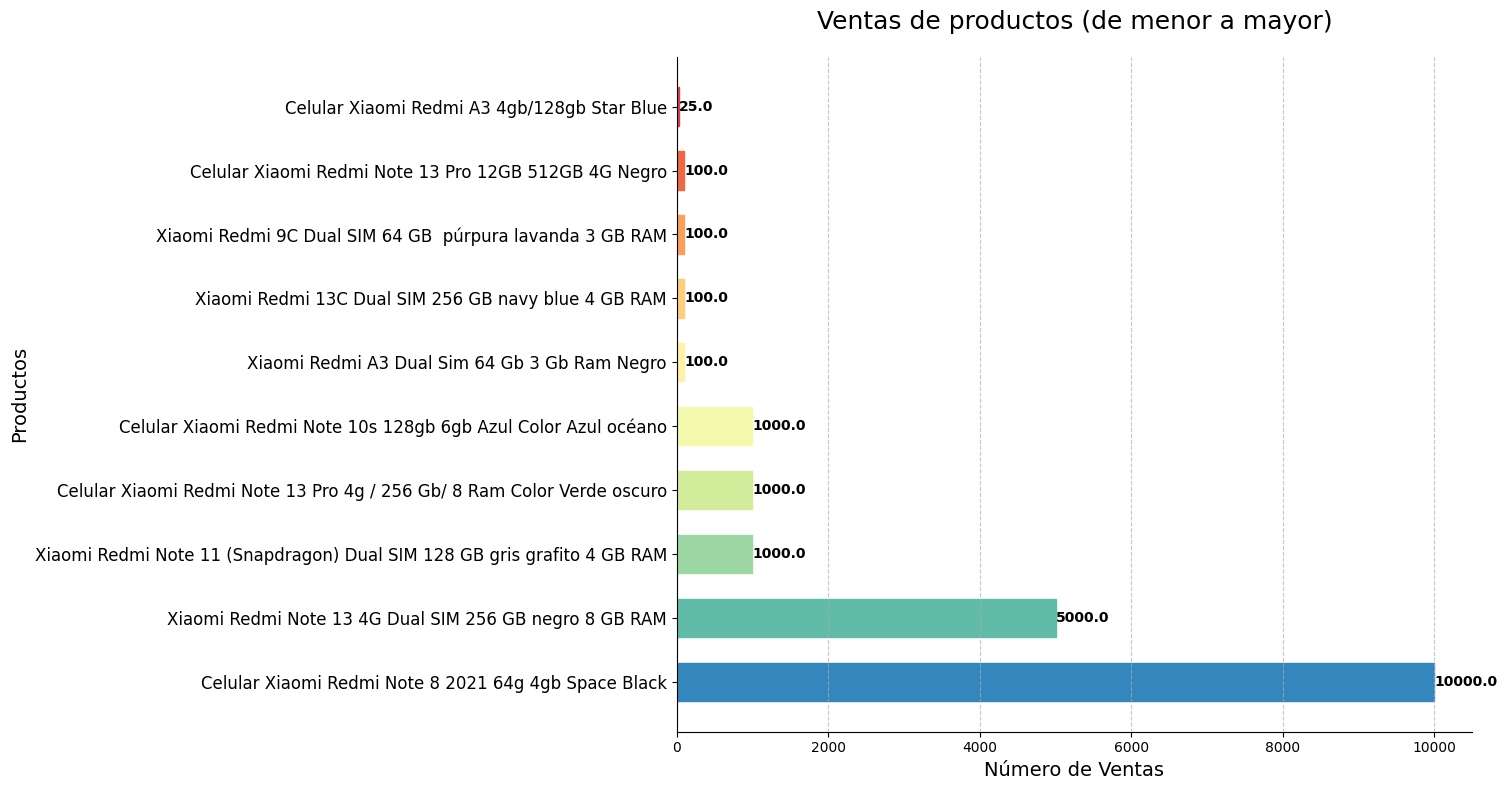

In [ ]:
# Convertir la columna 'ventas_limpias' a numérico
df['ventas_limpias'] = pd.to_numeric(df['ventas_limpias'], errors='coerce')

# Ordenar el dataframe por 'ventas_limpias' en orden ascendente
df_sorted_ventas = df.sort_values('ventas_limpias', ascending=True)

# Crear el gráfico
plt.figure(figsize=(15, 8))
bars = plt.barh(df_sorted_ventas['Nombre'], df_sorted_ventas['ventas_limpias'], height=0.6)

# Personalizar los colores
colors = plt.cm.Spectral(np.linspace(0.1, 0.9, len(df_sorted_ventas)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Personalizar el gráfico
plt.title('Ventas de productos (de menor a mayor)', fontsize=18, pad=20)
plt.xlabel('Número de Ventas', fontsize=14)
plt.ylabel('Productos', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Agregamos líneas de cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Aumentamos el tamaño de la fuente para los nombres de los productos
plt.yticks(fontsize=12)

# Agregamos etiquetas de valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# Ajustamos el diseño
plt.tight_layout()

# Mostramos el gráfico
plt.show()

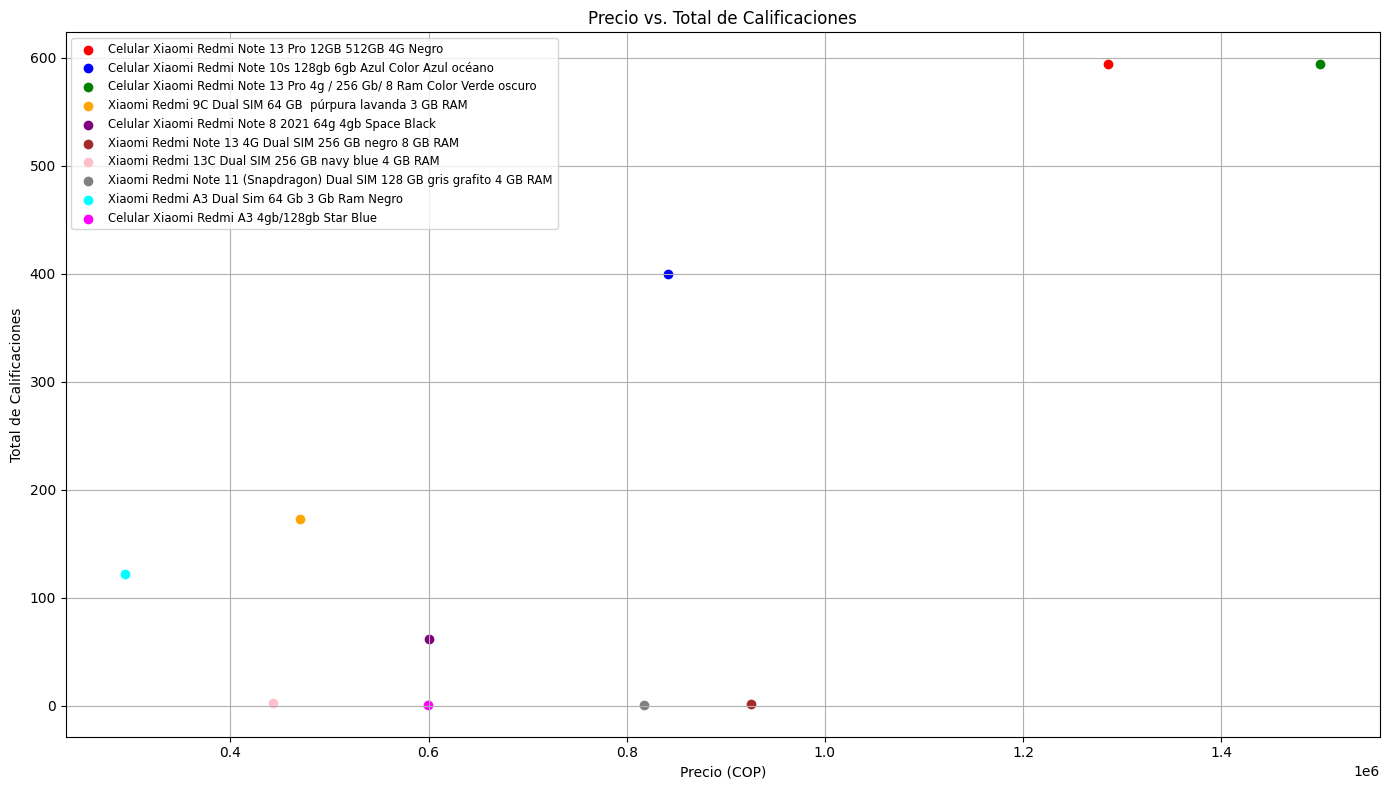

In [ ]:
# Convertir la columna 'Precio' a numérico
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')

# Convertir la columna 'total_calificaciones' a numérico
df['total_calificaciones'] = pd.to_numeric(df['total_calificaciones'], errors='coerce')

# Gráfico de dispersión con colores y etiquetas para cada producto
plt.figure(figsize=(14, 8))

# Lista de colores para cada producto
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Iteramos a través de los productos y creamos un punto para cada uno con su color y etiqueta
for i in range(min(10, len(df))):
  plt.scatter(df['Precio'][i], df['total_calificaciones'][i], color=colors[i], label=df['Nombre'][i])

plt.legend(loc='best', fontsize='small')
plt.xlabel('Precio (COP)')
plt.ylabel('Total de Calificaciones')
plt.title('Precio vs. Total de Calificaciones')
plt.grid(True)
plt.tight_layout()
plt.show()

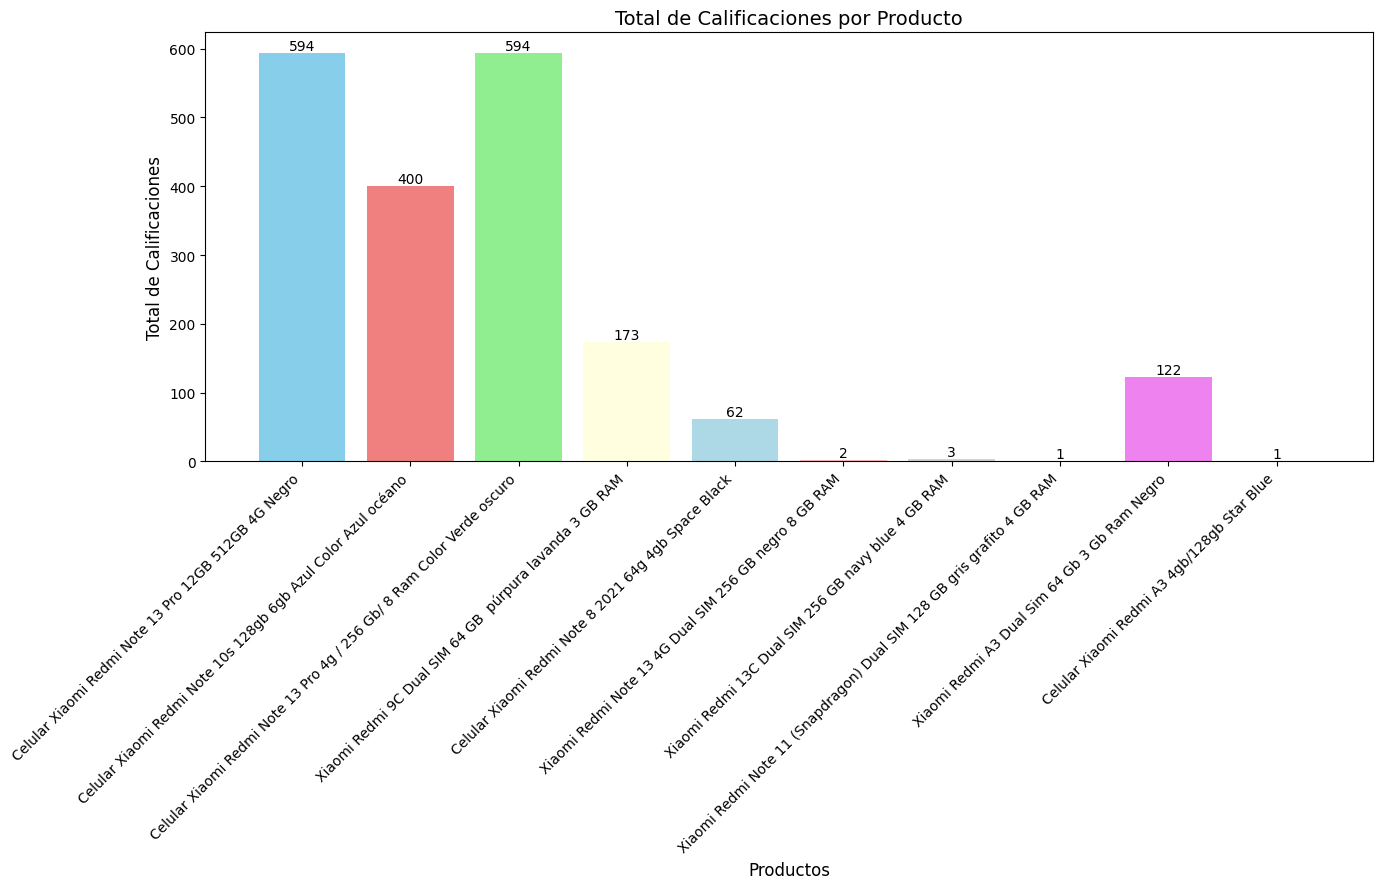

In [ ]:
# Convertir 'total_calificaciones' a numérico
df['total_calificaciones'] = pd.to_numeric(df['total_calificaciones'], errors='coerce')

# Crear el gráfico de barras
plt.figure(figsize=(14, 9))
bars = plt.bar(df['Nombre'], df['total_calificaciones'], color=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'lightpink', 'lightgray', 'orange', 'violet', 'gold'])
plt.xlabel('Productos', fontsize=12)
plt.ylabel('Total de Calificaciones', fontsize=12)
plt.title('Total de Calificaciones por Producto', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

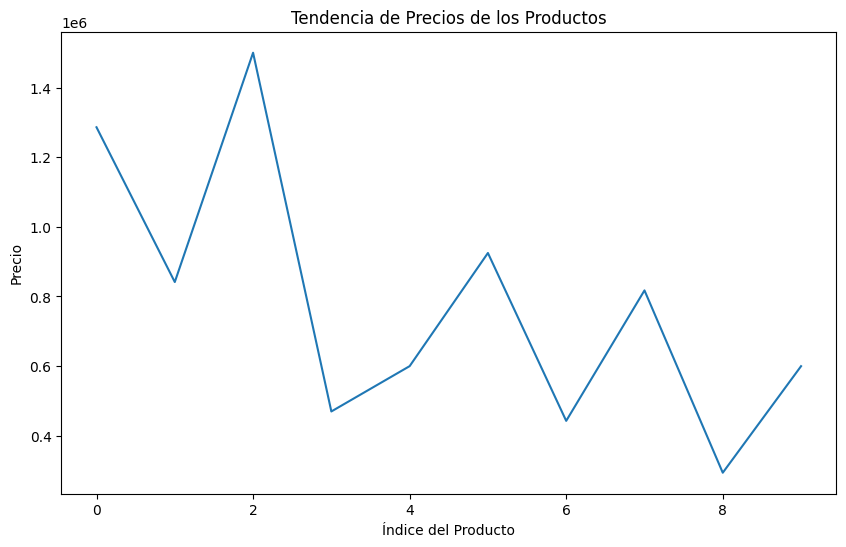

In [ ]:
# Gráfico de tendencia de precios
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Precio')
plt.title('Tendencia de Precios de los Productos')
plt.xlabel('Índice del Producto')
plt.ylabel('Precio')
plt.show()

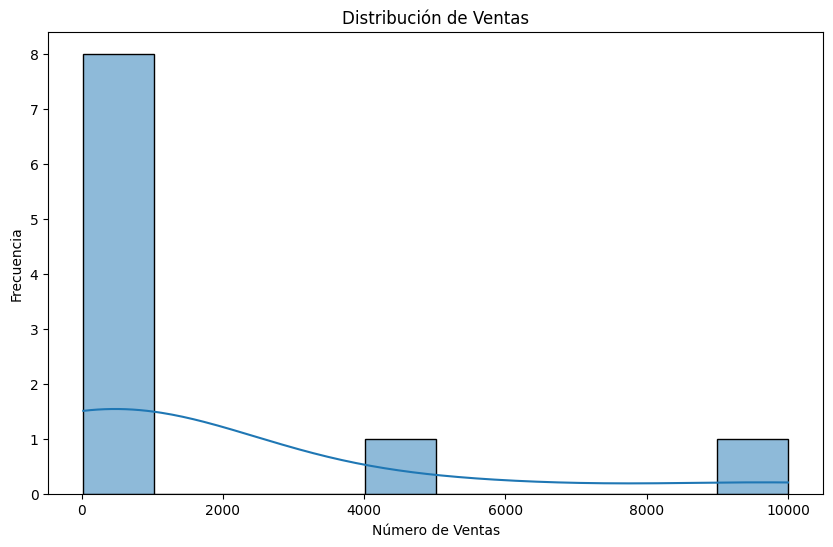

In [ ]:
# Gráfico de distribución de ventas
plt.figure(figsize=(10, 6))
sns.histplot(df['ventas_limpias'], bins=10, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Número de Ventas')
plt.ylabel('Frecuencia')
plt.show()

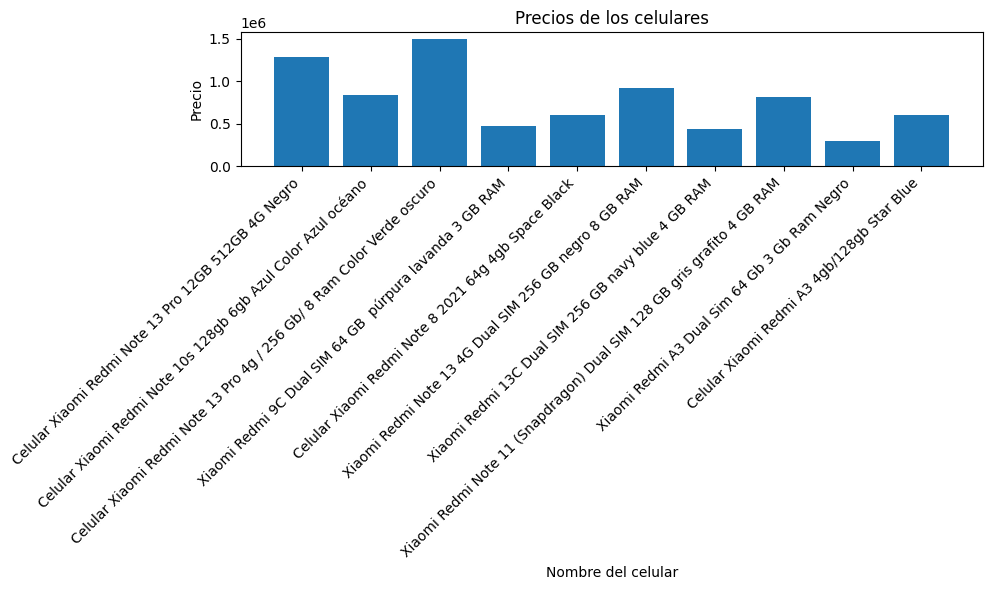

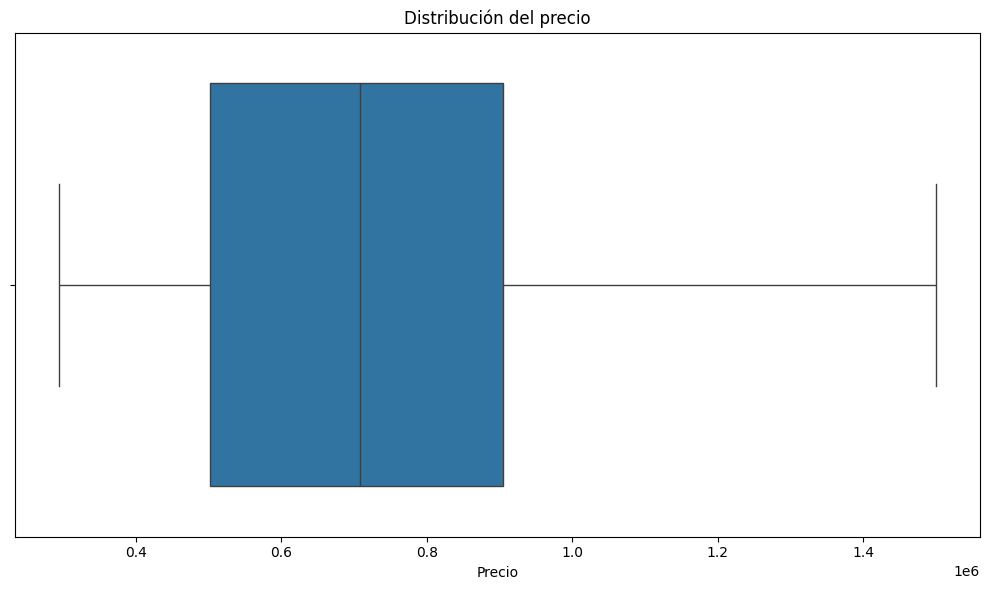

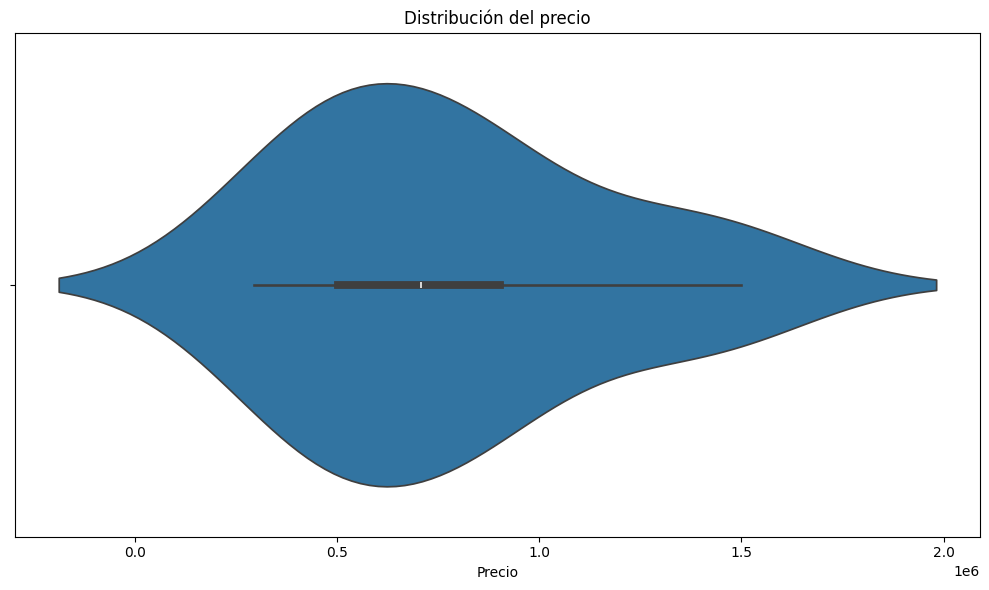

In [ ]:
# Gráfico de barras para el precio de los celulares
plt.figure(figsize=(10, 6))
plt.bar(df['Nombre'], df['Precio'])
plt.xlabel('Nombre del celular')
plt.ylabel('Precio')
plt.title('Precios de los celulares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n")

# Gráfico de caja para el precio
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Precio'])
plt.xlabel('Precio')
plt.title('Distribución del precio')
plt.tight_layout()
plt.show()
print("\n")

# Gráfico de violín para el precio (más detallado que el de caja)
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Precio'])
plt.xlabel('Precio')
plt.title('Distribución del precio')
plt.tight_layout()
plt.show()

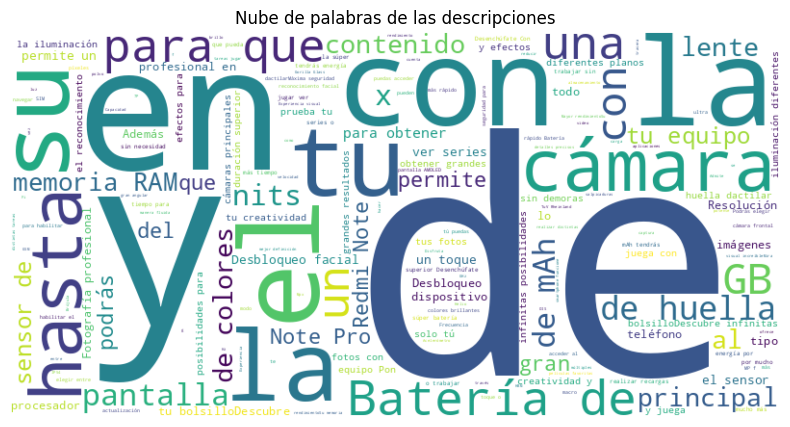

In [ ]:
# Obtener todas las descripciones
descripciones = df['Descripción'].tolist()

# Unir todas las descripciones en un solo texto
texto_descripciones = ' '.join(descripciones)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_descripciones)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las descripciones')
plt.show()